# Project Business Statistics: E-news Express

### Daniele Pelizan

## Define Problem Statement and Objectives

### Problem Statement
Background: 
An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.


### Objective:
Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.
You are expected to perform the statistical analysis to answer the following questions:
1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Do the users spend more time on the new landing page than the old landing page?
3.	Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4.	Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5.	Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.


### Data Dictionary:
1.	user_id - This represents the user ID of the person visiting the website.
2.	group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3.	landing_page - This represents whether the landing page is new or old.
4.	time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5.	converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6.  language_preferred - This represents the language chosen by the user to view the landing page.


## Import all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

## 1. Explore the dataset and extract insights using Exploratory Data Analysis.

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
df = pd.read_csv('abtest.csv')


### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
# View the first 5 rows of the data frame
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
# Checking the shape of the data frame
df.shape

(100, 6)

* The dataset contains 100 rows and 6 columns

In [5]:
# Checking the data type of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* The dataset has 2 numerical columns: user_id and time_spent_on_the_page.
* The dataset has 4 categorical columns: group, landing_page, converted and language_preferred. They are object data type.

In [6]:
# Checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There are no missing values in this dataset.

In [7]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# writing the code to convert 'group', 'landing_page', 'converted' and 'language_preferred' into categorical data.
df['group'] = df['group'].astype('category')
df['landing_page'] = df['landing_page'].astype('category')
df['converted'] = df['converted'].astype('category')
df['language_preferred'] = df['language_preferred'].astype('category')

In [8]:
# Summary statistics from the data frame
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


* The average time that the users spent on the page is 5.37 minutes.

In [9]:
df.describe(exclude='number').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,French,34


* There are 2 groups, with 50 users each.
* There are 2 landing pages, with 50 users each.
* There are 3 languages. 
* There are 2 converted status.

### Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#### User ID

In [12]:
# check the unique values
df.user_id.value_counts()

546560    1
546473    1
546483    1
546482    1
546481    1
         ..
546590    1
546589    1
546588    1
546587    1
546559    1
Name: user_id, Length: 100, dtype: int64

In [13]:
df.user_id.value_counts().shape

(100,)

* There are 100 users in our dataset, and they are unique. There is not the same user in the control and treatment group.

#### Group

In [14]:
# check the unique values
df.group.value_counts()

control      50
treatment    50
Name: group, dtype: int64

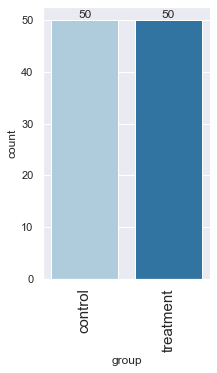

In [15]:
# For categorical variables we want to study the number of observations in each category
# We use the user defined function labeled_barplot() to plot a countplot
labeled_barplot(df, 'group')

*  As mentioned in the problem statement, there are 2 groups, the control group and the treatment group. There are 50 users in each group.

#### Landing page

In [16]:
#check the unique values
df.landing_page.value_counts()

new    50
old    50
Name: landing_page, dtype: int64

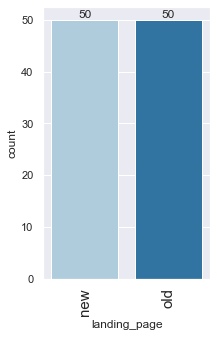

In [17]:
# For categorical variables we want to study the number of observations in each category
# We use the user defined function labeled_barplot() to plot a countplot
labeled_barplot(df, 'landing_page')

*  As mentioned in the problem statement, there are 2 landing pages, the new and the old. There are 50 users in each page. The old page is for the control group, the new page is for the treatment group.

#### Converted

In [18]:
# check the unique values
df.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

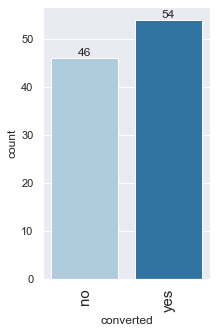

In [19]:
# For categorical variables we want to study the number of observations in each category
# We use the user defined function labeled_barplot() to plot a countplot
labeled_barplot(df, 'converted')

* 54 users are converted to a subscriber of the news portal, 46 users are not converted to a subscriber of the news portal.

#### Language Preferred

In [20]:
# check the unique values
df.language_preferred.value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

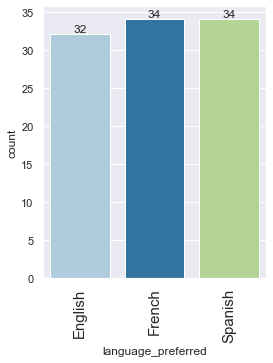

In [21]:
# For categorical variables we want to study the number of observations in each category
# We use the user defined function labeled_barplot() to plot a countplot
labeled_barplot(df, 'language_preferred')

* There are 3 languages, French, Spanish and English. French and Spanish are the preferred, but they are chosen by almost the same number of users as English.

#### Time spent on the page

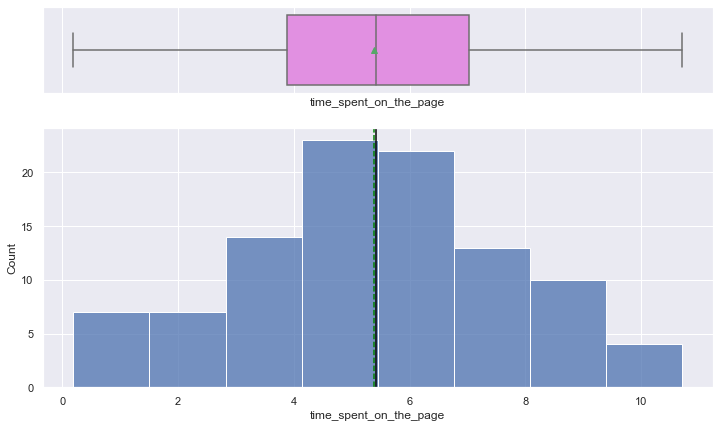

In [22]:
histogram_boxplot(df, 'time_spent_on_the_page')

* The average time spend on the news page is similar to the median, and the time is almost equaly distributed in both sides of the average line.
* A large quantity of users spend 4 to 7 minutes in the news page.

### Bivariate Analysis

In [23]:
# Bivariate analysis for categorical variables: 
# we want to study the number of observations in each category in relationship to another categorical variable
# For this purpose we are going to plot a bar graph using the countplot function
# We are going to create a function that generates the plots
# This function takes the categorical variable as the input
# The bars will be labeled with the number of observations 
# For the argument perc=True the bar will be labeled with the percentage of observations 
# For the argument n= any integer number, the plot will have the n bars with the biggest number of obervations


def labeled_countplot (data, feature, hue, perc=False, n=None):   
          
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    hue: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])       # length of the column - number of rows in that column
    
    plt.figure(figsize=(7, 5))
    
    # Creating the bar plot with a variable ax assigned to our plot. Then latter we can make manipulatios in this plot.
    ax = sns.countplot(data=data, x=feature, palette="Paired", hue=hue, order=data[feature].value_counts().index[:n],
                      hue_order=df[hue].value_counts().index[:n])

    
    # Iterating over the bars one-by-one using the patches function to count the number of bars
    for p in ax.patches:   
        if perc == True:
            label = "{:.1f}%".format( 100 * p.get_height() / total )  # calculating the percentage of each class of the category
        else:
            label = p.get_height()  # count of each class of the category
           
        # Get the x coordinate of the text by getting the width of the bar in which we are going to put our label   
        x = p.get_x() + p.get_width() / 2  
                
        # Get the y coordinate of the text by getting the height of the bar
        y = p.get_height() 
                
        # Writing our label in the x,y coordinates over the bar, 
        # and leave some space between the label and the boundary of the bar (xytext)
        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  
        
    # Add a legend and position it outside the plot
    ax.legend(bbox_to_anchor=(1.2,1))        

    plt.show()  # Show the plot

#### Landing page and Time spent on the page

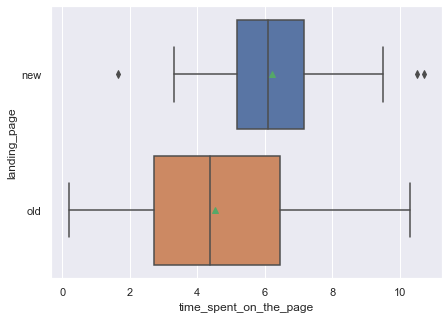

In [24]:
# There are 2 landing pages. Let's plot a boxplot to see how long the users stayed in each page.

plt.figure(figsize=(7, 5))

sns.boxplot(data=df, x='time_spent_on_the_page', y='landing_page', 
            order=df.groupby('landing_page').time_spent_on_the_page.mean().sort_values(ascending=False).index, showmeans=True )

plt.show()

* The distribution of time spent on the page differs among the new and the old landing page.
* The users, in average, stay more time in the new page, around 6 minutes.
* The users stay in average around 4 minutes in the old page.
* The average of time spent on the page is almost the same value as the median, for both old and new page.

#### Landing page and Converted user

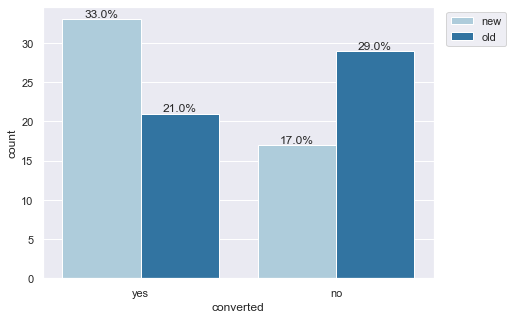

In [25]:
# Let's check the relationship between the landing page and converted ploting a countplot
# Let's use the user define function labeled_countplot (data, feature, hue, perc=False, n=None)
  
labeled_countplot (df, 'converted', 'landing_page', perc=True)

* Of all the users in our dataset, 33% are converted to a subscriber in the new page and 21% are converted to a subscriber in the old page.
* The number of users in the new page that are converted to a subscriber is much bigger than the users converted to a subscriber in the old page.

#### New page and converted user

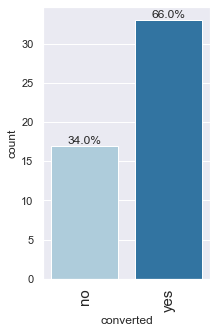

In [26]:
# Let's check the relationship between the new landing page and converted ploting a countplot
# Let's use the user define function labeled_barplot (data, feature, perc=False, n=None)
# We use only the data relative to the new page in the dataset
  
labeled_barplot (df[df.landing_page == 'new'], 'converted', perc=True)

* 66% of the users in the new page are converted to a subscriber.

#### Old page and converted user

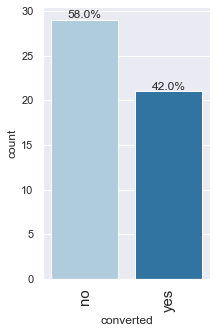

In [27]:
# Let's check the relationship between the new landing page and converted ploting a countplot
# Let's use the user define function labeled_barplot (data, feature, perc=False, n=None)
# We use only the data relative to the old page in the dataset
  
labeled_barplot (df[df.landing_page == 'old'], 'converted', perc=True)

* 42% of the users in the old page are converted to a subscriber.

#### Landing page and Language preferred

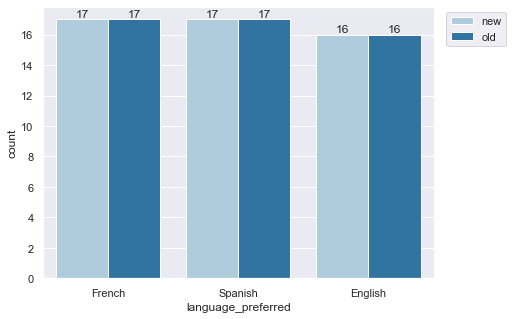

In [28]:
# Let's check the relationship between the landing page and preferred language ploting a countplot
# Let's use the user define function labeled_countplot(data, feature, hue, perc=False, n=None)
  
labeled_countplot (df, 'language_preferred', 'landing_page')

* The language is evenly distributed in the old and new page.

#### Converted user and time spent on the page

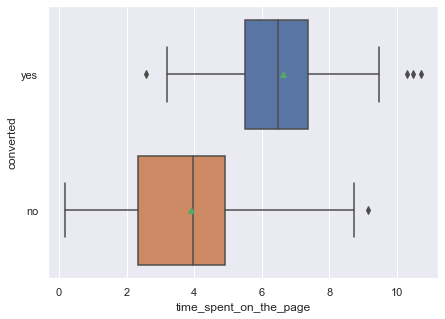

In [29]:
# Let's plot a boxplot to see how long the converted and not converted users stayed in the news portal.

plt.figure(figsize=(7, 5))

sns.boxplot(data=df, x='time_spent_on_the_page', y='converted', 
            order=df.groupby('converted').time_spent_on_the_page.mean().sort_values(ascending=False).index, showmeans=True )

plt.show()

* The converted users spend more time in the news page than the not converted.
* The converted users spend in average 6,5 minutes in the news page. The not converted spend 4 minutes.

#### Converted user and Language preferred

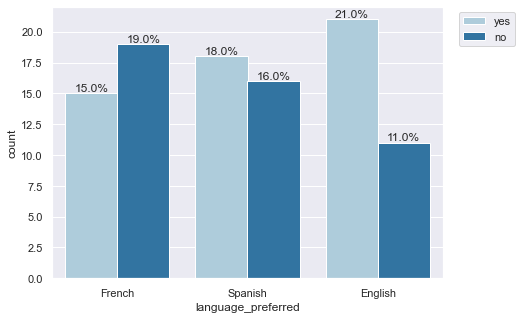

In [30]:
# Let's check the relationship between the converted user and preferred language ploting a countplot
# Let's use the user define function labeled_countplot(data, feature, hue, perc=False, n=None)
  
labeled_countplot (df, 'language_preferred', 'converted', perc=True)

* The English users are the ones that converted to a subscriber the most, followed by the Spanish and French.
* Almost half of the Spanish users are converted and half are not converted.
* The number of French users not converted is bigger than the French users converted.

#### Language preferred  and time spent on the page

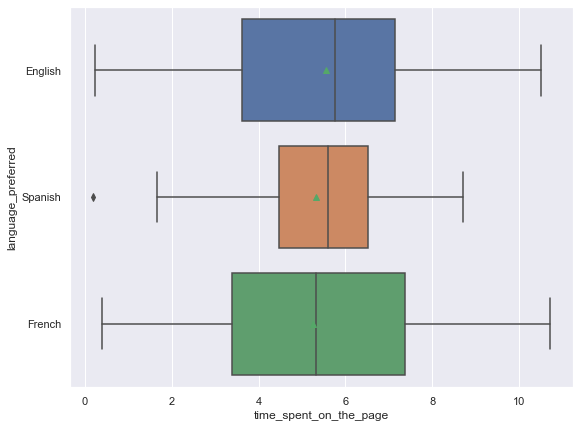

In [31]:
# Let's check the relationship between the language preferred and time spent on the page
# We plot a boxplot

plt.figure(figsize=(9, 7))

sns.boxplot(data=df, x='time_spent_on_the_page', y='language_preferred', showmeans=True, 
             order=df.groupby('language_preferred').time_spent_on_the_page.mean().sort_values(ascending=False).index)

plt.show()

* The mean time spent on the page is very similar for all the languages.

### Multivariate Analysis

#### Converted user and time spent on the page for each landing page

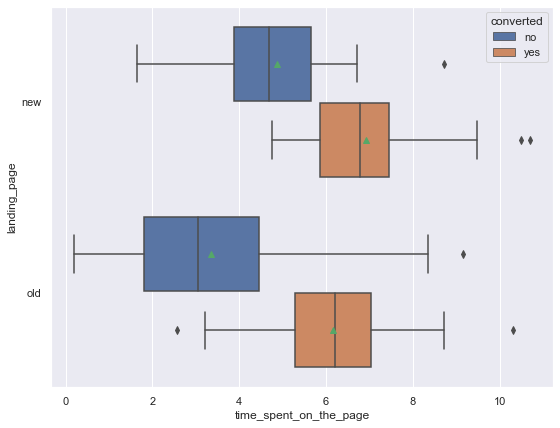

In [32]:
# There are 2 landing pages. Let's plot a boxplot to see how long the users stayed in each page.

plt.figure(figsize=(9, 7))

sns.boxplot(data=df, x='time_spent_on_the_page', y='landing_page', hue='converted',
            order=df.groupby('landing_page').time_spent_on_the_page.mean().sort_values(ascending=False).index, showmeans=True )

plt.show()

* The users that are converted to subscriber spend more time in both old and new page compared to the users that are not converted.
* The users that are converted spend in average about 6 minutes in the old page and 7 minutes in the new page. 
* The users that are not converted to a subscriber spend more time in the new page than in the old page. The not converted users spend in average 5 minutes in the new page and 3.5 minutes in the old page.
* In general, the users spend more time in the new page.

#### Converted user and Language preferred in the new page

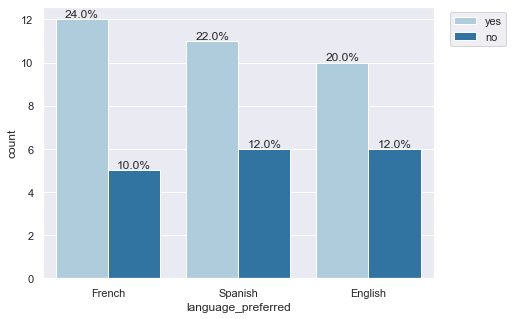

In [33]:
# Let's check the relationship between the converted user, language preferred and the new landing page
# We use the defined function labeled_countplot to plot a countplot
# We use only the data relative to the new page in the dataset

labeled_countplot (df[df.landing_page == 'new'], 'language_preferred', 'converted', perc=True)

* In the new page there are more users converted than not converted, for the three languages.
* In the new page the rate of conversion is almost the same for the three languages.
* In the new page the French users are the ones that converted to a subscriber the most, followed by the Spanish and English.
* In the new page the number of users converted are almost twice the number ousers not converted, for the three languages.
* It seems that all the languages like the new page.

#### Converted user and Language preferred in the old page

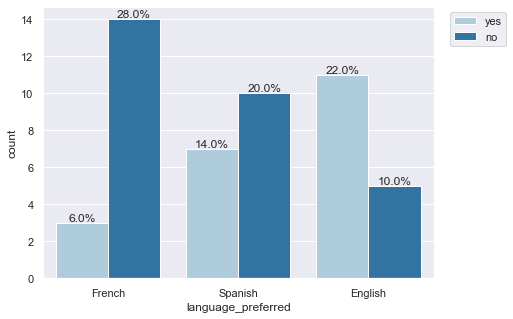

In [34]:
# Let's check the relationship between the converted user, language preferred and the old landing page
# We use the user defined function labeled_countplot() to plot a countplot
# We use only the data relative to the old page in the dataset

labeled_countplot (df[df.landing_page == 'old'], 'language_preferred', 'converted', perc=True)

* In the old page the number of English users converted is bigger and more than twice than the number of English users not converted.
* In the old page the number of Spanish users converted is less than the number of Spanish users not converted, but the difference is not so big. It seems that some of the Spanish users don't like the old page.
* In the old page the number of French users converted is much smaller than the number of French users not converted. It seems that the majority of French users don't like the old page.


Comparing the new and old page:
* The percentage of English users converted is similar for the new and the old page, 20% and 22% respectively. It seems the English users like the new page as much as the old page.
* The percentage of Spanish users converted is bigger in the new page than the old page, 22% and 14% respectively.
* The percentage of French users converted is much bigger in the new page than the old page, 24% and 6% respectively. 


#### Language preferred, time spent on the page and landing page

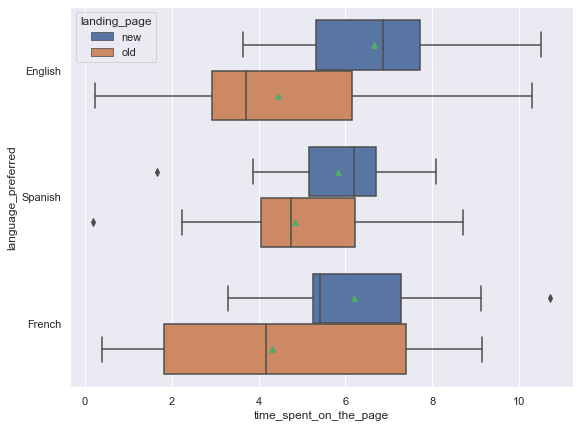

In [35]:
# Let's check the relationship between the language preferred, time spent on the page and landing page
# We plot a boxplot

plt.figure(figsize=(9, 7))

sns.boxplot(data=df, x='time_spent_on_the_page', y='language_preferred', hue='landing_page', showmeans=True,
            order=df.groupby('language_preferred').time_spent_on_the_page.mean().sort_values(ascending=False).index)

plt.show()

* All the languages spent more time in the new page than in the old page.
* The average time spent in the new page is not so differente for all the languages, between 6 and 7 minutes.
* The average time spent in the old page is not so differente for all the languages, around 4,5 minutes.
* In the new page all the languages have a narrow distribution compared to the old page. 
* In average the American users spent more time in the new page.
* In the old page the French language have a wider distribution and the French users spent in average less time in the old page.

#### Language preferred, time spent on the page and converted status

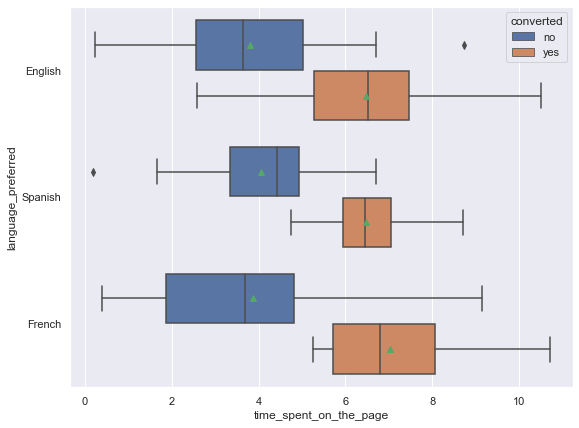

In [36]:
# Let's check the relationship between the language preferred, time spent on the page and converted status
# We plot a boxplot

plt.figure(figsize=(9, 7))

sns.boxplot(data=df, x='time_spent_on_the_page', y='language_preferred', hue='converted', showmeans = True,
            order=df.groupby('language_preferred').time_spent_on_the_page.mean().sort_values(ascending=False).index)

plt.show()

* The users that are converted for all the languanges spent more time in the page than the users not converted.
* The average time spent on the page for the converted users is almost the same for all the languages, around 6,5 and 7 minutes.
* The average time spent on the page for the not converted users is almost the same for all the languages, around 4 minutes.

## 2. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

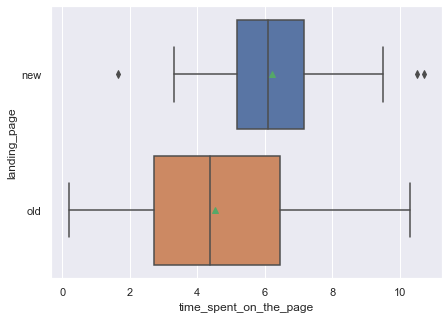

In [37]:
# Let's plot a boxplot to check the time spent in each landing page
plt.figure(figsize=(7, 5))

sns.boxplot(data=df, x='time_spent_on_the_page', y='landing_page', 
            order=df.groupby('landing_page').time_spent_on_the_page.mean().sort_values(ascending=False).index, showmeans=True )

plt.show()

* The distribution of time spent on the page differs among the new and the old landing page.
* The users, in average, stay more time in the new page. 


### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ The mean time spent in the new page is equal to the mean time spent in the old page.

Against the alternate hypothesis

> $H_a:$ The mean time spent in the new page is greater than the mean time spent in the old page.

Let $\mu_1$ and $\mu_2$ be the mean time spent in the new landing page and the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

> $H_0: \mu_1 = \mu_2 $

> $H_a: \mu_1 > \mu_2 $

### Step 2: Select Appropriate test

This is a one-tailed two sample mean test. 

It's a random sampling from the population as it was informed in the problem statement. 

As we are taking random samples from two differente groups, the two samples are from two independent populations.

The population standard deviations are unknown.

A two independent sample t-test for equality of means will be appropriate for this problem.

To use the t-test the populations need to follow the normal distribution. We don't know if the populations follow the normal distribution. We will use the Shapiro-Wilk's test of normality.

We don't know if the population standard deviations are equal or unequal. We will calculate the sample standard deviations to assume if the population standard deviations are equal or unequal.


#### Checking if the populations are normally distributed

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the page does not follow a normal distribution

In [38]:
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since the p-value is greater than the significance level (0.564 > 0.05) we fail to reject the null hypotesis. The populations follow the normal distribution.

#### Checking if the population standard deviations are equal or unequal

In [39]:
print('The standard deviation of time spent in the new page is', 
      round(df[df['landing_page'] == 'new'].time_spent_on_the_page.std(), 2))
print('The standard deviation of time spent in the old page is', 
      round(df[df['landing_page'] == 'old'].time_spent_on_the_page.std(), 2))
print('The ratio of the two samples standard deviation is',
      round((df[df['landing_page'] == 'new'].time_spent_on_the_page.std()/
      df[df['landing_page'] == 'old'].time_spent_on_the_page.std()), 4) )

The standard deviation of time spent in the new page is 1.82
The standard deviation of time spent in the old page is 2.58
The ratio of the two samples standard deviation is 0.7037


If the ratio of two sample standard deviations is between 0.7 ans 1.4, the population standard deviations may be assumed to be equal.

In our case, the ratio is 0.7037 which is too close to the low limit. Let's use the Levene's test for equality of variance to reach a conclusion.

####  Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [40]:
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df[df['landing_page'] == 'new'].time_spent_on_the_page,
                            df[df['landing_page'] == 'old'].time_spent_on_the_page)
# find the p-value
print('The p-value is', p_value)

The p-value is 0.008950671168914445


Since the p-value is less than the significance level (0.0089 < 0.05) we reject the null hypothesis. We can say that the population variances are different, which means the population standard deviation are unequal.

In this case a two independent sample t-test for equality of means for unequal and unknown standard deviations will be appropriate for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼  = 0.05.

### Step 4: Collect and prepare data

In [41]:
# separate the time spent on the page wiht respect to the two landing pages
time_spent_new_page = df[df['landing_page'] == 'new'].time_spent_on_the_page
time_spent_old_page = df[df['landing_page'] == 'old'].time_spent_on_the_page

### Step 5: Calculate the p-value

In [42]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value using ttest_ind
test_stat, p_value = ttest_ind(time_spent_new_page, time_spent_old_page, equal_var = False, alternative = 'greater')

# print the p-value
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [43]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Thus, we have enough statistical evidence to say that the mean time spent on the new page is greater than on the old page. The users spend more time on the new landing page.

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

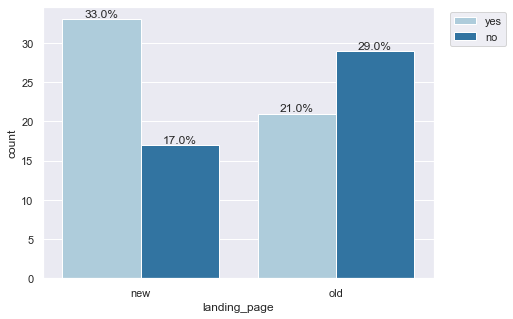

In [44]:
# Let's check the relationship between the landing page and converted ploting a countplot
# Let's use the user define function labeled_countplot(data, feature, hue, perc=False, n=None)

labeled_countplot (df, 'landing_page', 'converted', perc=True)

The percentage of users converted in the new page is bigger than in the old page.

### Step 1: Define the null and alternate hypotheses

We want to see if the conversion rate for the new page is greater than the conversion rate for the old page.

The conversion rate is the proportion of users who visit the landing page and get converted.

> $H_0:$ The conversion rate for the new page is equal to the conversion rate for the old page.

> $H_a:$ The conversion rate for the new page is greater than the conversion rate for the old page.

Let $p_1,p_2$ be the proportion of users who visit the landing page and get converted, for the new and the old page respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

The formulated hypotheses are concerned with proportions. 

This is a binomally distributed population: the user get converted or not.

It's a random sampling from the population as it was informed in the problem statement.

When both np and n(1-p) are greater than or equal to 10, the binomial distribution can be approximated by a normal distribution. n and p refer to the sample size and sample proportion respectively. Let's check:

In [45]:
# check if the sample can be aproximated by a normal distribution

# sample size: number of users in the new and old page
n_new_page = df.landing_page.value_counts().new
n_old_page = df.landing_page.value_counts().old

# convertion_count: number of users in the new and old page that get converted
converted_new_page = df[df.landing_page == 'new'].converted.value_counts().yes
converted_old_page = df[df.landing_page == 'old'].converted.value_counts().yes

# calculating the np and n(1-p)
n1p1 = n_new_page * (converted_new_page/ n_new_page)
n1_1minusp1 = n_new_page * (1 - converted_new_page/ n_new_page)
n2p2 = n_old_page * (converted_old_page/ n_old_page)
n2_1minusp2 = n_old_page * (1 - converted_old_page/ n_old_page)

# checking if np and n(1-p) are greater than or equal to 10
if n1p1 >= 10 and n2p2 >= 10 and n1_1minusp1 >= 10 and n2_1minusp2 >= 10:
    print ('The sample can be aproximated by a normal distribution')
else:
    print ('The sample can not be aproximated by a normal distribution')

The sample can be aproximated by a normal distribution


The Z-test for two proportions can be used to analyse the hypotheses and draw a conclusion. 

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼  = 0.05.

### Step 4: Collect and prepare data

In [46]:
# set the convertion counts
convertion_counts = np.array([converted_new_page, converted_old_page])

# set the sample sizes
nobs = np.array([n_new_page, n_old_page])

print('The sample size, or the number of users in the new and old page are {0} and {1} respectively'
      .format(n_new_page, n_old_page))
print('The number of users in the new and old page that get converted are {0} and {1} respectively'
      .format(converted_new_page, converted_old_page))
print('\n')
print('The conversion rate for the new and old page are {0} and {1} respectively'
      .format(round(converted_new_page/n_new_page, 2), round(converted_old_page/n_old_page,2)))



The sample size, or the number of users in the new and old page are 50 and 50 respectively
The number of users in the new and old page that get converted are 33 and 21 respectively


The conversion rate for the new and old page are 0.66 and 0.42 respectively


The conversion rate for the new page is bigger than the old page. Let's conduct the test to see if this is statistically significant.

### Step 5: Calculate the p-value

In [47]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# find the p-value using proportion_ztest
test_stat, p_value = proportions_ztest(convertion_counts, nobs, alternative = 'larger')
# print the p-value
print('The p-value is ', p_value)

The p-value is  0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [48]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Thus, we have enough statistical evidence to say that the conversion rate for the new page is greater than the conversion rate for the old page.

## 4. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

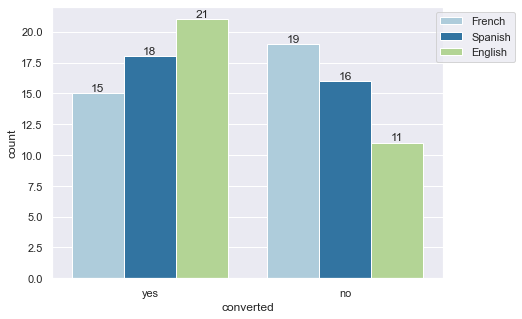

In [49]:
# For categorical variables we want to study the number of observations in each category
# For this purpose we are going to plot a bar graph using the countplot function
# We are going to use the user defined function labeled_countplot(data, feature, hue, perc=False, n=None):  
labeled_countplot (df, 'converted', 'language_preferred')


The number of users for each language its almost the same in our dataset. But the number of users converted varies for each language.

The English users were the ones that converted the most. The number of converted it's almost the same as the number of not converted for the Spanish users. The number of converted it's lower than the number of not converted for the French users. 

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ Conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion is NOT independent of preferred language.

### Step 2: Select Appropriate test

This is a test of independency, concerning two categorical variables: converted (yes / no) and language preferred (French / English / Spanish).

It's a random sampling from the population as it was informed in the problem statement.

As we can verify in the plot, the number of sample observations in each level of the variable is at least 5.

The appropriate test is the Chi-square test for independence.

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼  = 0.05.

### Step 4: Collect and prepare data

In [50]:
# Lets's use the pd.crosstab function to create a contingency table with the discrete variables for our test
data = pd.crosstab(df.converted, df.language_preferred)
data

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [51]:
# Let's remove the lables by dropping the first column

data1 = data.reset_index(drop=True)
data1

language_preferred,English,French,Spanish
0,11,19,16
1,21,15,18


### Step 5: Calculate the p-value

In [52]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value using chi2_contingency()
chi, p_value, dof, expected = chi2_contingency(data1)

# print the p-value
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [53]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

As the p-value is greater than the significance level (0.213 > 0.05) we fail to reject the null hypothesis. Thus, we have enough statistical significance to conclude that the converted status is independent of the preferred language.

## 5. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

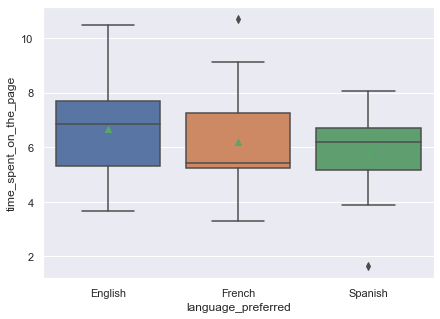

In [54]:
# creating a new dataset with only the new page data
df_new=df[df.landing_page == 'new']

# Let's plot a boxplot to check the time spent on the new page for each language
plt.figure(figsize=(7, 5))

sns.boxplot(data=df_new, y='time_spent_on_the_page', x='language_preferred', showmeans=True )

plt.show()

The mean time spent on the page is greater for the English language. 

The average time spent in the new page is not so differente for all the languages, between 6 and 7 minutes.

### Step 1: Define null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for English, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean of time spent on the new page is different from the rest.


### Step 2: Select appropriate test

We are comparing the means of three independent populations. 

One-way ANOVA is the appropriate test, but we need to check the assumptions that the populations are normally distributed and the population variances are equal.

For testing of normality, Shapiro-Wilk's test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [55]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value using the dataset with only the new page data
w, p_value = shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


As the p-value is much larger than the significance level (0.804 > 0.05), we fail to reject the null hypothesis. The time spent on the new page follows the normal distribution.

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [56]:
#Assumption 2: Homogeneity of Variance
# import the required function
from scipy.stats import levene

# find the p-value using the dataset with only the new page data
statistic, p_value = levene(df_new[df_new.language_preferred == 'English'].time_spent_on_the_page,
                           df_new[df_new.language_preferred == 'French'].time_spent_on_the_page,
                           df_new[df_new.language_preferred == 'Spanish'].time_spent_on_the_page)
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is larger than the significance level (0.467 > 0.05), we fail to reject the null hypothesis. All the population variances are equal.

Since the assumptions of normality and equality of variance are met, we can now use the one-way ANOVA test.

### Step 3: Decide the significance level  

As given in the problem statement, we select  𝛼  = 0.05.

### Step 4: Collect and prepare data

In [57]:
# separate the time spent on the new page with respect to the three languages
time_English = df_new[df_new.language_preferred == 'English'].time_spent_on_the_page
time_French  =  df_new[df_new.language_preferred == 'French'].time_spent_on_the_page
time_Spanish = df_new[df_new.language_preferred == 'Spanish'].time_spent_on_the_page


### Step 5: Calculate the p-value

In [58]:
# import the required function
from scipy.stats import f_oneway

# find the p-value using the f_oneway funcion
test_stat, p_value = f_oneway(time_English, time_French, time_Spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [59]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is greater than the significance level (0.432 > 0.05), we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent on the new page is equal for English, French and Spanish language.

## Conclusion and Business Recommendations

## Conclusions


* A large quantity of users spends 4 to 7 minutes in the news page (old and new page together). 
* The users spend more time in the new page than in the old page. Around 6 minutes and 4 minutes in average respectively.
* The conversion rate for the new page is greater than the conversion rate for the old page. 66% of the users in the new page are converted to a subscriber against 42% of the users in the old page.
* Considering the new and old page together, the converted status is independent of the preferred language.

* Comparing the new and old page:
>* The percentage of English users converted is similar for the new and the old page, 20% and 22% respectively. It seems the English users like the new page as much as the old page.
>* The percentage of Spanish users converted is bigger in the new page than the old page, 22% and 14% respectively.
>* The percentage of French users converted is much bigger in the new page than the old page, 24% and 6% respectively.

* The mean time spent on the new page is equal for English, French and Spanish languages.


## Business Recommendations

* The news company should adopt the new landing page as the news page, since the new landing page is more effective to gather new subscribers.
* The desing team of the news company should study why the changes in the new page didn't increase the conversion rate for the English users.
* The desing team of the news company should study what works in the new page and what din't work in the old page for the Spanish and French users, to keep in mind for future changes in the news page.